In [53]:

import pandas as pd
from clean_tabular_data import DataTabular

data_products = DataTabular('\\Products.csv')
data_products.clean_price_column()
print(data_products.df.info())
print(data_products.df.head())

ModuleNotFoundError: No module named 'chardet'

In [4]:


data_products.df[['cat:0','cat:1','cat:2']] = data_products.df["category"].apply(lambda x: pd.Series(str(x).split(' / ',2)))


In [5]:
cat0_keys = data_products.df['cat:0'].unique()
cat0_encoder = {}
cat0_decoder = {}
for _ in range(len(cat0_keys)):
    cat0_encoder[cat0_keys[_]] = _
    cat0_decoder[_] = cat0_keys[_]

In [26]:
data_images =  DataTabular('Images.csv')
data_images.df.head()
df_with_category = pd.merge(data_images.df,data_products.df,left_on = 'product_id',right_on ='id',how='inner')
df_with_category.info()
df_with_category.rename(columns={'id_x':'label'})
df_with_category.to_csv('training_data.csv')





ASCII
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11122 entries, 0 to 11121
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0                        11122 non-null  object 
 1   id_x                 11122 non-null  object 
 2   product_id           11122 non-null  object 
 3   index                11122 non-null  int64  
 4   id_y                 11122 non-null  object 
 5   product_name         11122 non-null  object 
 6   category             11122 non-null  object 
 7   product_description  11122 non-null  object 
 8   price                11122 non-null  float64
 9   location             11122 non-null  object 
 10  cat:0                11122 non-null  object 
 11  cat:1                11122 non-null  object 
 12  cat:2                6768 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [58]:
import pandas as pd
df = pd.read_csv('training_data_sandbox\\training_data_clean.csv') 
df.drop_duplicates(subset=['product_id'],inplace=True)
df.to_csv('training_data_sandbox\\training_data_clean.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6228 entries, 0 to 11120
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           6228 non-null   int64  
 1   Unnamed: 1           6228 non-null   int64  
 2   id_x                 6228 non-null   object 
 3   product_id           6228 non-null   object 
 4   index                6228 non-null   int64  
 5   id_y                 6228 non-null   object 
 6   product_name         6228 non-null   object 
 7   category             6228 non-null   object 
 8   product_description  6228 non-null   object 
 9   price                6228 non-null   float64
 10  location             6228 non-null   object 
 11  cat:0                6228 non-null   object 
 12  cat:1                6228 non-null   object 
 13  cat:2                3776 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 729.8+ KB
None


In [20]:
import pandas as pd
df = pd.read_csv('training_data_sandbox\\training_data_clean.csv') 
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.iloc[:5500]
df_test = df.iloc[5501:].reset_index()
#df_train = df(df.iloc[10000])
#df_test = df.index[10001:]
#print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   level_0              1121 non-null   int64  
 1   Unnamed: 0           1121 non-null   int64  
 2   Unnamed: 1           1121 non-null   int64  
 3   id_x                 1121 non-null   object 
 4   product_id           1121 non-null   object 
 5   index                1121 non-null   int64  
 6   id_y                 1121 non-null   object 
 7   product_name         1121 non-null   object 
 8   category             1121 non-null   object 
 9   product_description  1121 non-null   object 
 10  price                1121 non-null   float64
 11  location             1121 non-null   object 
 12  cat:0                1121 non-null   object 
 13  cat:1                1121 non-null   object 
 14  cat:2                659 non-null    object 
dtypes: float64(1), int64(4), object(10)
me

In [21]:
df_train.to_csv('training_with_reserved_test.csv')
df_test.to_csv('test.csv')

In [11]:
from torchvision import models
model    = models.resnet50(  weights='IMAGENET1K_V2')
c = 0
for _ in model.children(): 
    print(_)


Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
ReLU(inplace=True)
MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, t

In [10]:
enumerate(model.children())

In [1]:
import boto3 
s3_client = boto3.client('s3')

ModuleNotFoundError: No module named 'boto3'

In [7]:
import json
import pickle
from pytorch_handle import CustomImageDataset

full_data = CustomImageDataset('training_data.csv')
pkl_data = pickle.dumps(full_data.encoder)
with open('model_final\\encoder.pkl', 'wb') as f:
    f.write(pkl_data)
pkl_data = pickle.dumps(full_data.decoder)
with open('model_final\\decoder.pkl', 'wb') as f:
    f.write(pkl_data)

In [5]:
import pickle

with open('model_final\\decoder.pkl', 'rb') as f:
    decoder =  pickle.load(f)
with open('model_final\\encoder.pkl', 'rb') as f:
    incoder =  pickle.load(f)

In [51]:
import requests
from PIL import Image
#host = 'http://host.docker.internal:8080'
#host = 'http://127.0.0.1:8080'
host = 'http://63.33.191.55:8080' # ec2 instance adress
host = 'http://127.0.0.1:8000'   # local instance adress 
file_path = 'images_fb\\images\\' # the image from test dataset
file_name   = 'e4bda74a-ff51-4d6c-8f6b-2d5372002696.jpg'
Image.open(file_path+file_name)

url =  host+'/healthcheck'
resp = requests.get(url) 
print(resp.json())

url = host+'/predict/feature_embedding'
file = {'file': open(file_path+file_name, 'rb')} # the image embedding
resp = requests.post(url=url,files=file)
print(resp.json())

url = host+'/predict/similar_images'
file = {'file': open(file_path+file_name, 'rb')} # the image embedding
resp = requests.post(url=url,files=file)
print(resp.json())

url = host+'/predict/category'
file = {'file': open(file_path+file_name, 'rb')} # the image embedding
resp = requests.post(url=url,files=file)
print(resp.json())


{'message': 'API is up and running!'}
{'features': [-2.368464946746826, 13.174310684204102, -0.543910026550293, -2.8501176834106445, -4.0968337059021, -2.8316729068756104, -2.7486696243286133, 2.2515857219696045, 5.493769645690918, -0.16655577719211578, -2.096698522567749, -1.4156063795089722, -2.0876779556274414]}
{'similar_index': [6280, 6274, 6470, 6124, 5864], 'image_labels': ['7e44bf16-d842-4c87-bd7f-0179057cb354', '7e1dd4d1-1bd7-4b44-9466-306ff6c0348e', '820c7f90-047f-4e66-b6dd-a8316f32864b', '7afb5a35-153b-4c99-8ae2-faa44e70e232', '75ccf4a6-f52f-4ecf-b91c-11e207ed11e1']}
{'category_index': 1, 'category': 'Baby & Kids Stuff'}


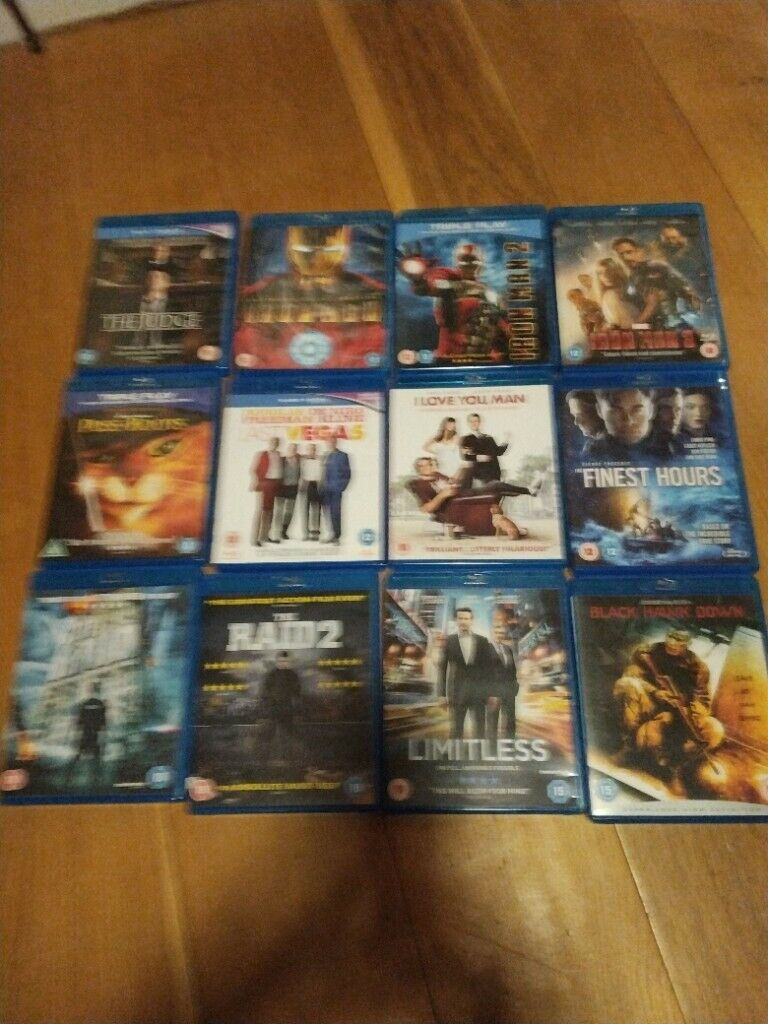

In [52]:
Image.open(file_path+file_name)
